In [ ]:
"""Solved this problem by considering approach of sequence of charecters in the name.
step 1: Make a master directory (from the corpus of names in the data) of charecters asa label encoding.
step 2:Tranform names to arrays of maximum size of name (15) and length of Master directory (27)
step 3:Transformig label into array of male = [1,0] and female = [0,1]
Step 4: train the LSTM model for 15 epoches to get the desired Result"""



In [35]:
# importing all the required labs
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dense, Activation, Dropout, LSTM, Bidirectional,SimpleRNN
from sklearn.model_selection import train_test_split
import pickle

In [2]:

name_df = pd.read_csv("./name_gender.csv")
name_df.columns = ['name','gender','score']
name_df = name_df.append({'name' : 'Aaban','gender' : 'M','score' : 1.0},ignore_index = True)

In [3]:
# For count of male and females in data set
name_df.groupby(['gender']).name.count()


# Distribution of number of charecters in name of male and female
def len_name(name):
    return(len(name))
name_df['name'] = name_df.name.apply(lambda x :x.lower())
name_df['name_len'] = name_df.apply(lambda x : len_name(x['name']),axis=1)

In [4]:
# Maximum and minimum lenght of charecters of names
print(f"Maximum {name_df.name_len.max()} charecters name are present in data set")
print(f"Minimum {name_df.name_len.min()} charecters name are present in data set")


all_names = [i for i in name_df.name]
all_aplha = (',').join(('').join(all_names))
all_alpha = set([i for i in all_aplha])
alpha_number  = dict((i,a) for a,i in enumerate(all_alpha))

"""alpha_number is a master dictionary to train the model"""

Maximum 15 charecters name are present in data set
Minimum 2 charecters name are present in data set


In [37]:
alpha_number

{'t': 14,
 'x': 1,
 'z': 2,
 'n': 3,
 'j': 4,
 'q': 5,
 'u': 6,
 'c': 7,
 'm': 8,
 'i': 9,
 'g': 10,
 'o': 11,
 'e': 12,
 'b': 13,
 ',': 0,
 'v': 15,
 'k': 16,
 'r': 17,
 's': 18,
 'y': 19,
 'h': 20,
 'a': 21,
 'f': 22,
 'd': 23,
 'l': 24,
 'p': 25,
 'w': 26}

In [22]:
def label_gender(gender):
    if gender == "F":
        return([0,1])
    else:
        return([1,0])
    
maxlen = name_df.name_len.max()
def zero_padding(list1):
    for i in range(len(list1),maxlen):
        list1.append(0)
    return(list1)

def set_flag(i):
    tmp = np.zeros(len(alpha_number));
    tmp[i] = 1
    return(tmp)

def new_data_encode(name_encoded_vector):
    aa = []
        
    for i in name_encoded_vector:
        aa.append(set_flag(i))
    return(aa)

def name_encoding(name,max_len_name,len_alpha_number):
    padding = zero_padding([alpha_number[i] for i in my_name])
    print(padding)
    encode_data = np.array(tuple(new_data_encode(padding)))
    print(encode_data)
    encode_name = encode_data.reshape(1,max_len_name,len_alpha_number)
    return(encode_name)

In [23]:
# Converting name to array 
name_df["name_encoded_vector"] = name_df.name.apply(lambda x : [alpha_number[i] for i in x])
name_df['name_encoded_vector'] = name_df.name_encoded_vector.apply(lambda x : zero_padding(x))
name_df["new_name_encoded"] = name_df.name_encoded_vector.apply(lambda x : new_data_encode(x))
name_df["label_gender"] = name_df.gender.apply(lambda x : label_gender(x))

In [24]:
new_data_encode(zero_padding(name_df.name_encoded_vector[0]))

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.

In [31]:

X = np.array(tuple(name_df.new_name_encoded))
Y = np.array(tuple(name_df.label_gender))
X = X.reshape(name_df.shape[0],15,27) 
Y = Y.reshape(name_df.shape[0],2)

x_train,x_test,y_train,y_test = train_test_split(X,Y)


print("the shape of x_train",x_train.shape)
print("the shape of y_train",y_train.shape)
print("the shape of x_test",x_test.shape)
print("the shape of x_test",y_test.shape)

the shape of x_train (71268, 15, 27)
the shape of y_train (71268, 2)
the shape of x_test (23757, 15, 27)
the shape of x_test (23757, 2)


In [32]:
# Model building using LSTM adding droupout to avoid overfitting.
print('Build model...')
model = Sequential()
model.add(LSTM(512, return_sequences=True,input_shape =(15,27)))
model.add(Dropout(0.2))
model.add(LSTM(512, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
batch_size = 256
history = model.fit(x_train,y_train,batch_size=batch_size, epochs=15, verbose=1, validation_data =(x_test, y_test))


Build model...

Train on 71268 samples, validate on 23757 samples
Epoch 1/15
71268/71268 [==============================] - 24s 337us/step - loss: 0.4545 - accuracy: 0.7855 - val_loss: 0.3936 - val_accuracy: 0.8240
Epoch 2/15
71268/71268 [==============================] - 23s 328us/step - loss: 0.3636 - accuracy: 0.8411 - val_loss: 0.3560 - val_accuracy: 0.8464
Epoch 3/15
71268/71268 [==============================] - 23s 328us/step - loss: 0.3391 - accuracy: 0.8536 - val_loss: 0.3430 - val_accuracy: 0.8528
Epoch 4/15
71268/71268 [==============================] - 23s 327us/step - loss: 0.3190 - accuracy: 0.8624 - val_loss: 0.3141 - val_accuracy: 0.8658
Epoch 5/15
71268/71268 [==============================] - 23s 329us/step - loss: 0.2993 - accuracy: 0.8713 - val_loss: 0.3002 - val_accuracy: 0.8708
Epoch 6/15
71268/71268 [==============================] - 23s 329us/step - loss: 0.2832 - accuracy: 0.8798 - val_loss: 0.2949 - val_accuracy: 0.8792
Epoch 7/15
71268/71268 [================

NameError: name 'plt' is not defined

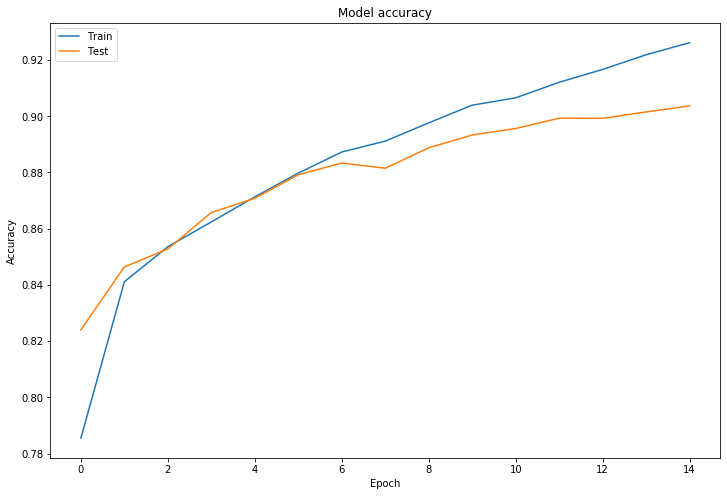

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [36]:
#saving the model and loding it again for evaluating the test data

filename = 'gender_classification_lstm.sav'
pickle.dump(model, open(filename, 'wb'))
 

loaded_model = pickle.load(open(filename, 'rb'))
score,acc = loaded_model.evaluate(x_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)

# accuracy of 90% percent obtained

23757/23757 [==============================] - 13s 559us/step
Test score: 0.24777965236779953
Test accuracy: 0.9036915302276611
